In [344]:
import numpy as np
import matplotlib.pyplot as plt

In [345]:
!ls

3_9_1.0000_-3.4000_1.0000_2.0000_10000000_17_2D_gc_K.dat
3_9_1.0000_-3.4000_1.0000_2.0000_10000000_17_2D_gc_N.dat
3_9_1.0000_-3.4000_1.0000_2.0000_10000000_17_2D_gc_V.dat
4_1.0000_-1.4000_2.0000_1000000000_Nhist.pdf
4_1.0000_-1.4000_2.0000_100000000_Nhist.pdf
4_1.0000_-1.4000_2.0000_15000000_Nhist.pdf
4_4_1.0000_-1.2237_1.0000_2.0000_100000000_17_1D_can_K.dat
4_4_1.0000_-1.2237_1.0000_2.0000_100000000_17_1D_can_N.dat
4_4_1.0000_-1.2237_1.0000_2.0000_100000000_17_1D_can_V.dat
4_4_1.0000_-1.2237_1.0000_2.0000_1000000_17_1D_can_K.dat
4_4_1.0000_-1.2237_1.0000_2.0000_1000000_17_1D_can_N.dat
4_4_1.0000_-1.2237_1.0000_2.0000_1000000_17_1D_can_V.dat
4_4_1.0000_-1.4000_1.0000_2.0000_1000000000_17_1D_gc_K.dat
4_4_1.0000_-1.4000_1.0000_2.0000_1000000000_17_1D_gc_N.dat
4_4_1.0000_-1.4000_1.0000_2.0000_1000000000_17_1D_gc_V.dat
4_4_1.0000_-1.4000_1.0000_2.0000_100000000_17_1D_gc_K.dat
4_4_1.0000_-1.4000_1.0000_2.0000_100000000_17_1D_gc_N.dat
4_4_1.0000_-1.4000_1.0000_2.0000_100000000_17_1D_gc_V.da

In [346]:
N_file = "4_4_1.0000_-1.4000_1.0000_2.0000_1000000000_17_1D_gc_N.dat"
N_data = np.loadtxt(N_file)
N_data = np.round(N_data).astype(int) # Round the entries because of numerical precision error

# Extract parameters
N = float(N_file.split("_")[1]) # 
U = float(N_file.split("_")[2]) # 
mu_gc = N_file.split("_")[3] # Grand canonical chemical potential
mu_gc = float(mu_gc.replace('\U00002013', '-')) # Convert string with negative to floar
beta = float(N_file.split("_")[5]) # 
sweeps = float(N_file.split("_")[6]) # 

In [347]:
bins = np.linspace(N_data.min(),N_data.max()+1,len(np.unique(N_data))+1)
N_histogram = np.histogram(N_data,bins=bins)
N_histogram

(array([  103,  1652,  8229, 22037, 29382, 20433, 10640,  2105,   148]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]))

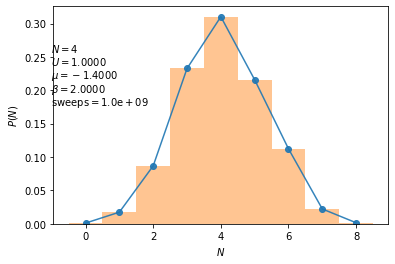

In [348]:
fig, ax = plt.subplots(1, 1)
ax.plot(N_histogram[1][:-1],N_histogram[0]/sum(N_histogram[0]),marker='o',alpha=0.9)
ax.hist(N_data,bins=bins,density=True,histtype='stepfilled',alpha=0.45,align='left') ;
#ax.axvline(2)
# xticks = np.linspace(N_data.min(),N_data.max(),dtype=int)
# ax.set_xticks(xticks);
ax.set_xlabel(r'$N$')
ax.set_ylabel(r'$P(N)$')
ax.annotate(r'$N=%d$'%(N),xy=(0.13,0.80),xycoords='figure fraction')
ax.annotate(r'$U=%.4f$'%(U),xy=(0.13,0.75),xycoords='figure fraction')
ax.annotate(r'$\mu=%.4f$'%(mu_gc),xy=(0.13,0.70),xycoords='figure fraction')
ax.annotate(r'$\beta=%.4f$'%(beta),xy=(0.13,0.65),xycoords='figure fraction')
ax.annotate(r'$\rm{sweeps}=%.1e$'%(sweeps),xy=(0.13,0.60),xycoords='figure fraction')
plt.savefig('%d_%.4f_%.4f_%.4f_%d_Nhist.pdf'%(N,U,mu_gc,beta,sweeps))

### Determining chemical potential

# $\mu(N) = \mu_{\rm{gc}} - \frac{1}{\beta} \log \frac{P(N+1)}{P(N)}$

We'll try to find the chemical potential $\mu(N)$ for which number of particles is equal to $N=9$.

In [349]:
P_N = (N_histogram[0]/sum(N_histogram[0]))
N = bins.astype(int)
if np.sum(P_N) == 1: print("P(N) is Normalized!")

P(N) is Normalized!


In [350]:
def mu(P_N,N,N_target,mu_gc,beta):
    
    N_idx = np.where(N==N_target)[0][0]
               
    return mu_gc - (1/beta)*np.log(P_N[N_idx+1]/P_N[N_idx])

    #return np.log(P_N[N_idx+1]/P_N[N_idx])

In [351]:
mu(P_N,N,4,mu_gc,beta)

-1.2183844994895279

In [352]:
P_N[5]

0.2156995217937485

In [353]:
mu_gc - (1/beta)*np.log(P_N[5]/P_N[4])

-1.2183844994895279